## HMDA DATA CHALLENGE

### The main reason for me to opt for jupyter is that it could be helpful in breaking down the code into smaller parts. And also the 'Markdown' option would help the reader understand my thought process and the approach I've taken in order to solve the business problem as I work through the data. Though I would be including a separate documentation, this .ipynb file by itself would serve as a kind of documentation.

In [1]:
#importing all the required packages required for importing the dataset, perform merge and export the document
import pandas as pd
import numpy as np
import time


In [12]:
#loading in both the data files
#applications_data represents the loan application data
#institutions_data represents the Institution data
def read_files():
    applications_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_loans_data.csv')
    institutions_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_institutions_data.csv')
    return applications_data,institutions_data

#### First things first! Looking at the rows \* column information for both the datasets

In [171]:
applications_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_loans_data.csv')
institutions_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_institutions_data.csv')
print applications_data.shape
print institutions_data.shape

(1321158, 24)
(21655, 12)


In [172]:
#Looking at the data to understand the data and the headings
print applications_data.head()
print institutions_data.head()

   Agency_Code Applicant_Income_000  As_of_Year Census_Tract_Number  \
0            3                 0084        2012             0207.00   
1            3                 0084        2012             9556.00   
2            3                 0053        2012             9556.00   
3            3                 0085        2012             0206.01   
4            3                 0038        2012             0107.01   

  County_Code FFIEC_Median_Family_Income  Loan_Amount_000 MSA_MD  \
0         079                   00054900               94  16620   
1         043                   00054900              133  16620   
2         043                   00054900               70  16620   
3         079                   00054900              102  16620   
4         039                   00054900              112  16620   

  Number_of_Owner_Occupied_Units Respondent_ID             ...               \
0                       00001545    0000000384             ...                
1     

#### Looks like the loan application data has more than 1 Million records. Interesting! The number of dimensions should be easy to handle.

#### I would need a common attribute across both the tables in order to perform the merge function. It can be got manually by looking through the column headers. But I am thinking of automating that process

In [140]:
appln_list_of_columns = list(applications_data)
institute_list_of_columns = list(institutions_data)
print set(appln_list_of_columns).intersection(institute_list_of_columns)

set(['Respondent_ID', 'Agency_Code', 'As_of_Year'])


In [13]:
def minimize_institution_data(institutions_data):
    institutions_data_minim['Respondent_Name_TS'] = pd.DataFrame(institutions_data['Respondent_Name_TS'])
    institutions_data_minim['Agency_Code'] = pd.DataFrame(institutions_data['Agency_Code'])
    institutions_data_minim['As_of_Year'] = pd.DataFrame(institutions_data['As_of_Year'])
#print ins_data_minim.shape

#### We can see three common columns between the two datasets. We have to take in all the three variables for merging the data

In [148]:

ins_data_minim.shape

(7914, 2)

In [14]:
def merge_tables(applications_data,ins_data_minim):
    merged_data = applications_data.merge(institutions_data_minim, how = 'left', on = ['Respondent_ID', 'Agency_Code', 'As_of_Year'])
    return merged_data

In [150]:
merged_data.shape

(1321158, 25)

In [131]:
print merged_data.head()
print merged_data.shape

   Agency_Code Applicant_Income_000  As_of_Year Census_Tract_Number  \
0            3                 0084        2012             0207.00   
1            3                 0084        2012             9556.00   
2            3                 0053        2012             9556.00   
3            3                 0085        2012             0206.01   
4            3                 0038        2012             0107.01   

  County_Code FFIEC_Median_Family_Income  Loan_Amount_000 MSA_MD  \
0         079                   00054900               94  16620   
1         043                   00054900              133  16620   
2         043                   00054900               70  16620   
3         079                   00054900              102  16620   
4         039                   00054900              112  16620   

  Number_of_Owner_Occupied_Units Respondent_ID              ...               \
0                       00001545    0000000384              ...                
1   

In [15]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes = "True")
#sns.distplot(merged_data.Loan_Amount_000, kde= False, bins = 5000,color = "red")

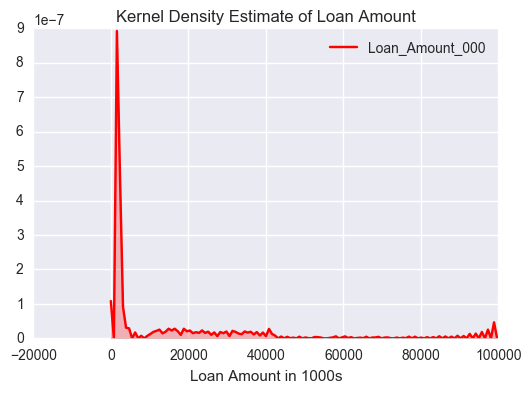

In [169]:
sns.kdeplot(merged_data.Loan_Amount_000, shade = True,color = "red")
plt.xlabel('Loan Amount in 1000s')
plt.title('Kernel Density Estimate of Loan Amount')

#### As we can see from the above histogram and kernel density estimates that the range of loan_amount is so high to draw a histogram

In [176]:
loan_amt_gr_1000 = merged_data.Loan_Amount_000 > 1000
loan_amt_gr_1000.value_counts()

False    1312988
True        8170
Name: Loan_Amount_000, dtype: int64

#### Forming a subset of that has loan_amount less than 800 to form a decipherable histogram

In [177]:
loan_amt = merged_data[merged_data.Loan_Amount_000 <= 1000]


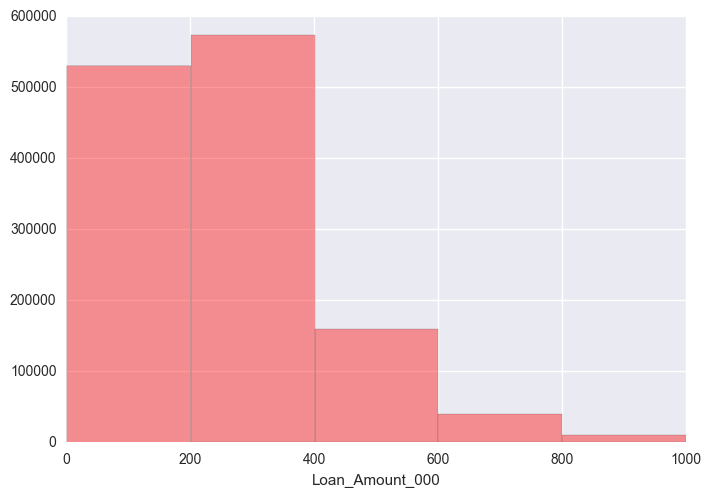

In [180]:
sns.distplot(loan_amt.Loan_Amount_000, bins = 10, color = 'red', kde = False)

#### I guess we can still get a better distribution if we form a subset having loan_amount less than or equal to 800

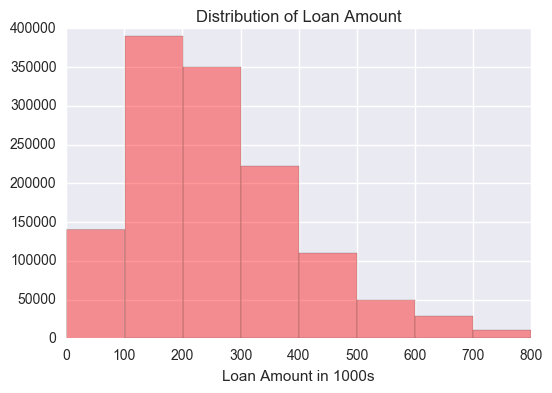

In [170]:
loan_amt = merged_data[merged_data.Loan_Amount_000 <= 800]
sns.distplot(loan_amt.Loan_Amount_000, bins = 8, color = 'red', kde = False)
plt.xlabel('Loan Amount in 1000s')
plt.title('Distribution of Loan Amount')

#### Based on the distribution, the following would be my rule for discretization:
#### When Loan_Amt < 100 => Low
####     Loan_Amt 100-300 => Medium
####     Loan_Amt 300-700 => High
####     Loan_Amt >700 => Very High

In [4]:
def loan_discret(c):
    if(c['Loan_Amount_000'] <=100):
        return 'Low'
    elif(c['Loan_Amount_000'] > 100 and c['Loan_Amount_000'] <= 300):
        return 'Medium'
    elif(c['Loan_Amount_000'] > 300 and c['Loan_Amount_000'] <= 300):
        return 'High'
    else:
        return 'Very High'

In [17]:
def create_loan_bin():
    merged_data['loan_bin'] = merged_data.apply(loan_discret, axis = 1)
    return merged_data

## PART 1 DELIVERABLES

In [5]:
def hmda_init():
    #app_data,ins_data = read_files()
    applications_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_loans_data.csv')
    institutions_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_institutions_data.csv')
    #ins_data_minim = minimize_institution_data(ins_data)
    ins_data_minim = pd.DataFrame(institutions_data['Respondent_ID'])
    ins_data_minim['Respondent_Name_TS'] = pd.DataFrame(institutions_data['Respondent_Name_TS'])
    ins_data_minim = ins_data_minim.drop_duplicates(subset=['Respondent_ID'])
    #merged_data = merge_tables(app_data,ins_data_minim)
    merged_data = applications_data.merge(ins_data_minim, how = 'left', on = 'Respondent_ID')
    #final_data = create_loan_bin()
    merged_data['loan_bin'] = merged_data.apply(loan_discret, axis = 1)
    return merged_data

In [6]:
hmda_init()

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag,Respondent_Name_TS,loan_bin
0,3,0084,2012,0207.00,079,00054900,94,16620,00001545,0000000384,...,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Low
1,3,0084,2012,9556.00,043,00054900,133,16620,00001548,0000000384,...,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
2,3,0053,2012,9556.00,043,00054900,70,16620,00001548,0000000384,...,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Low
3,3,0085,2012,0206.01,079,00054900,102,16620,00001935,0000000384,...,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
4,3,0038,2012,0107.01,039,00054900,112,16620,00001492,0000000384,...,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
5,3,0113,2012,0206.05,079,00054900,133,16620,00002493,0000000384,...,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
6,3,0091,2012,9555.00,043,00054900,192,16620,00001173,0000000384,...,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
7,3,0025,2012,0121.00,039,00054900,36,16620,00001361,0000000384,...,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Low
8,3,0111,2012,0019.02,039,00054900,191,16620,00001552,0000000384,...,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium
9,3,0070,2012,0206.05,079,00054900,110,16620,00002493,0000000384,...,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y,THE OHIO VALLEY BANK COMPANY,Medium


In [151]:
def hmda_to_json(data, states = [], conventional_conforming = ''):
    
    #print states
    
    timestamp = str(int(time.time()))
    
    if not states and (conventional_conforming == ''):
        data.to_csv(path_or_buf = 'F:\\merged_data_'+timestamp+'.csv')
    elif not states:
        data = data[(data['Conventional_Conforming_Flag'] == conventional_conforming)]
        data.to_csv(path_or_buf = 'F:\\merged_data_'+timestamp+'.csv')
    elif (conventional_conforming == ''):
        print data.shape[0]
        
        data = data[(data['State'].isin(states))]
        data.to_csv(path_or_buf = 'F:\\merged_data_'+timestamp+'.csv')
    
    else:
        data = data[data['State'].isin(states) & (data['Conventional_Conforming_Flag'] == conventional_conforming)]
        data.to_csv(path_or_buf = 'F:\\merged_data_'+timestamp+'.csv')


In [152]:
hmda_to_json(merged_data, states = ['WV' ,'DC'], conventional_conforming = 'Y')

['WV', 'DC']


#### 2. A

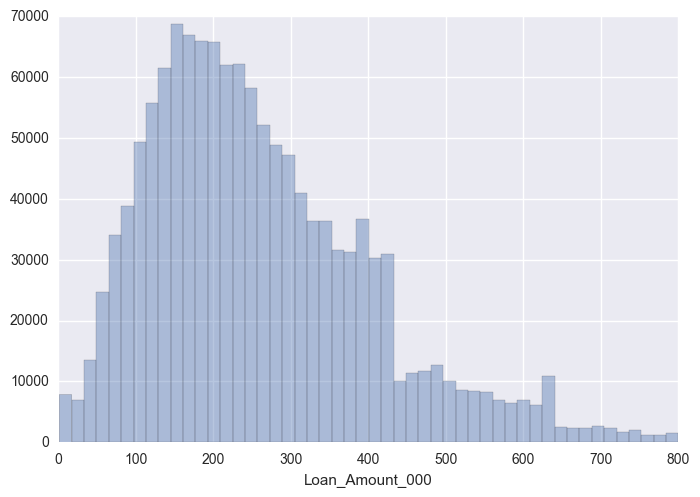

In [240]:
loan_amt = merged_data[merged_data.Loan_Amount_000 <=800]
sns.distplot(loan_amt.Loan_Amount_000, kde = False, color = 'red')

In [107]:
print merged_data['Loan_Amount_000'].mean()
print merged_data['Loan_Amount_000'].median()
#When the loan amount being entered is greater than double the median, raise a warning
#From the distribution, we can clearly see that the Loan Amount distribution is heavily right skewed.
#This can mean two things:
#1) One thing is that the Loan Amount is really very high on some occassions
#2) THe second conclusion we could arrive at is that the person entering the data may not have understood that Loan_Amount is expressed in 000s

#For the above-mentioned assumption, following would be my technique to monitor quality
#This function is to be triggered once a new entry is tried to be entered into the column.

def loan_amt_check(value):
    if (value < 0):
        raise('Loan Amount cannot be negative')
    elif (not(str(value).isdigit())):
        raise('The entry should be numeric')
    elif (value > (merged_data['Loan_Amount_000'].median()*3)):
        warn('The value seems to be large. Please recheck the value you are entering')


290.233111407
235.0


In [111]:
institutions_data = pd.read_csv('F:\\CapOne_DataChallenge\\2012_to_2014_institutions_data.csv')
print institutions_data.shape
print institutions_data['Respondent_ID'].nunique()

(21655, 12)
7914


#### Respondent_Name
#### As we use Respondent ID, Agency_Code and As_of_Year as the keys to match the respondents in both the applications and institutions table, we have to ensure data quality for both these three variables
#### In database terms, the Respondent_ID, Agency_Code and As_of_Year in the loan applications table should be referenced to the Respondent ID, Agency_Code and As_of_Year in the institutions table
#### What this means is that the Respondent_ID, Agency_Code and As_of_Year in the institutions table should have characteretics of a Primary Key and hence when taken together, they should be able to uniquely identify a record


#### Hence the following rule should be applied to Respondent ID in the loans table

In [120]:
#For each new value to be entered into Respondent_ID, we would be checking the agency code and year of entry to ensure that there are no redundant respondent_ids
def ins_resp_id_check(value, year, agency_code):
    ins_data_subset = institutions_data[(institutions_data['As_of_Year'] == year) and (institutions_data['Agency_Code'] == agency_code)]
    resp_id_list = list(ins_data_subset['Respondent_ID'])
    if(value in resp_id_list):
        raise 'The value you have specified is already present for the given year and agency code. The column is designed to accept unique values'
        
#There is also the need to ensure that each Responder_ID(for a particular year and agency code) has only one Respondent_Name

def ins_resp_name_check(value, year, agency_code):
    ins_data_subset = institutions_data[(institutions_data['As_of_Year'] == year) and (institutions_data['Agency_Code'] == agency_code)]
    res_name_list = list(ins_data_subset['Respondent_Name_TS'])
    if(value in resp_name_list):
        raise 'The respondent entry is already available'

#It is also important to ensure that the Respondent_ID in the loan applications table are referenced from the Respondent_ID in Institutions table

def app_resp_id_check(value, year, agency_code):
    ins_data_subset = institutions_data[(institutions_data['As_of_Year'] == year) and (institutions_data['Agency_Code'] == agency_code)]
    resp_id_list = list(ins_data_subset['Respondent_ID'])
    if(not(value in resp_id_list)):
        raise 'The Respondent_ID is not recognized'

#### 2 B Additional Columns to monitor (Automation in Data entry to avoid manual errors)

#### My initial thought about ensuring data quality is to reduce the amount of manual interventions. When this is accomplished, the number of errors in data would be decreased, or in other words, the quality of data would be increased.

#### My aim is to automate the the conventional and conforming variables and also the conventional_conforming flag which could be easily accompished by the entries we already have

#### Assumption: These entries are manually entered and are not automated

In [121]:
#for conventional status
def conventional_status(loan_type):
    applications_data['Conventional_Status'] = loan_type
    
#for conforming status
def conforming_status(Loan_Amount_000,Conforming_Amount_000):
    if(Loan_Amount_000 <= Conforming_Amount_000):
        applications_data['Conforming_Status'] = 'Conforming'
    else:
        applications_data['Conforming_Status'] = 'Jumbo'

#for conventional_conforming_status
def conventional_conforming_status(Conventional_Status, Conforming_Status):
    if(Conventional_Status == 'Conventional' and Conforming_Status == 'Conforming'):
        applications_data['Conventional_Conforming_Flag'] = 'Y'
    else:
        applications_data['Conventional_Conforming_Flag'] = 'N'

#### 2 B Numeric Values Check

#### We can also remove any inadvertent errors in numeric values by having a robust entry rule in place

In [122]:
def numeric_entry_check(value):
    if (value < 0):
        raise('Expecting the value to be positive for this field')
    elif (not(str(value).isdigit())):
        raise('The entry should be numeric')


In [103]:
from collections import Counter
list_of_respondents = (Counter(merged_data.Respondent_Name_TS)).items()
max_num = 0
max_respondent = ''
dict_resp = {}
for i in list_of_respondents:
    if (i[1] > max_num):
        max_num = i[1]
        max_respondent = i[0]
    dict_resp[i[0]] = i[1]
#print dict_resp[0]
print max(dict_resp, key=dict_resp.get), dict_resp[max(dict_resp, key=dict_resp.get)]
print dict_resp

WELLS FARGO BANK, NA 119016
{nan: 98304, 'FRANKLIN BANK & TRUST COMPANY': 1, 'ROUNDPOINT MORTGAGE COMPANY': 3887, 'MALVERN FEDERAL SAVINGS BANK': 4, 'NEW WINDSOR STATE BANK': 92, 'CORNERSTONE MORTGAGE COMPANY': 87, 'EXCEL MORTGAGE SERVICING, INC': 155, 'CNB BANK': 2, 'VIRGINIA COMMUNITY BANK': 50, 'USALLIANCE FEDERAL CREDIT UNIO': 9, 'BARCLAYS BANK DELAWARE': 6, 'AFFILIATED MORTGAGE COMPANY': 49, 'HOME COMMUNITY MORTGAGE LLC': 34, 'HEARTLAND BANK': 34, 'THE BANK OF DELMARVA': 65, 'F&M BANK': 2, 'FIRST OPTION MORTGAGE, LLC': 9, 'CAPITAL BANK N.A.': 7, 'SOUTHWEST BANK': 3, 'MADISON SQUARE F.S.B.': 109, 'FSGBANK, N.A.': 1, 'INTERCOASTAL MORTGAGE COMPANY': 5957, 'LEE BANK & TRUST COMPANY': 70, 'CITIZENS DEPOSIT BANK': 136, 'WSFS BANK': 1848, 'CAPON VALLEY BANK': 141, 'FIRST NEW ENGLAND FEDERAL C.U.': 1, '1ST PORTFOLIO LENDING CORP': 2079, 'BULLLDOG FEDERA CREDIT UNION': 13, 'STATE DEPARTMENT FCU': 858, 'UNION SAVINGS BANK': 10, 'MEDIA MEMBERS FCU': 2, 'PREMIER COMMERCIAL BANK': 5, 'SUMA FE

#### PART 3: Since the home loan dataset is limited to only the 5 states from where Change Financial operates and also since the filter feature in the 'online HMDA Tool' is under construction, I'll assume that the new geographic area is going to be a State from where Change already operates.

#### Hypothesis: From the 5 states Change Financial operates from, starting from the state of Maryland would yield the best results

#### Going by that assumption, I'd look at the 5 states from the dataset provided and analyze which would be the best stae from the 5. Although the analysis is limited to only 5 states, the set of analyses could be used to differentiate one region from another once the online HMDA Tool is fully functional.



In [153]:
#Loan_Amt per state (mean or median)
#No. of respondents in each state
#No.of application/No. of responders in each state
#Correlation between loan_amt and income
#Loan trend across each state across years
#Loan Amt based on Loan_Purpose_Description and identify the group that has the highest loan_amt
#Lien status description against states - states which have lot of first liens would favor the lender

#removing outliers based on analysis from 1
merged_data = hmda_init()
minim_merged_data = merged_data[merged_data['Loan_Amount_000'] <=800]


#### FIrst we'll have a look at the median loan amount arising from each state.

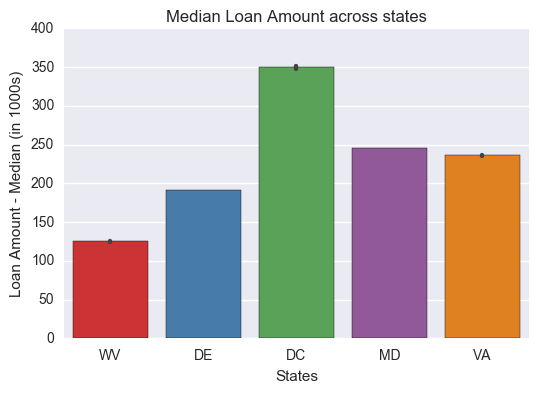

In [155]:
sns.barplot(data = minim_merged_data, x = 'State', y = 'Loan_Amount_000', estimator = np.median, palette = 'Set1')
plt.ylabel('Loan Amount - Median (in 1000s)')
plt.xlabel('States')
plt.title('Median Loan Amount across states')

In [32]:
print list(set(list(merged_data.State)))

['WV', 'VA', 'DE', 'DC', 'MD']


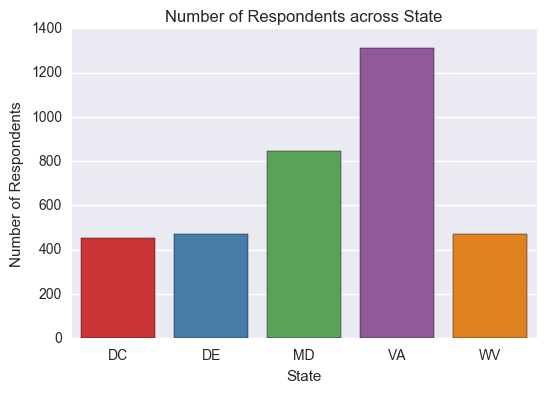

In [158]:
import matplotlib.pyplot as plt
uniq_resp_count = list(merged_data.groupby('State').Respondent_ID.nunique())
uniq_state = sorted(list(set(list(merged_data.State))))
appln_count = list(merged_data.groupby('State').Respondent_ID.count())
state_resp_appln_combo = []
for i in zip(uniq_state,uniq_resp_count,appln_count):
    state_resp_appln_combo.append(i)
state_resp_table = pd.DataFrame(state_resp_appln_combo, columns = ['State','No_of_Respondents','No_of_Applicants'])
state_resp_table['Applicants_per_Respondents'] = state_resp_table['No_of_Applicants']/state_resp_table['No_of_Respondents']
#print state_resp_table
sns.barplot(data = state_resp_table, x = 'State',y='No_of_Respondents',ci=0, palette = 'Set1', order = ['DC', 'DE', 'MD', 'VA', 'WV'])
plt.xlabel('State')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents across State')

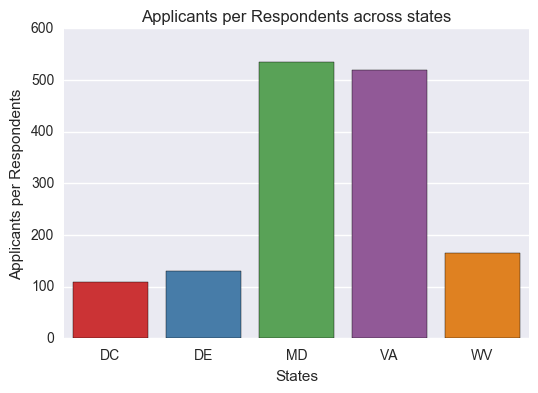

In [159]:
sns.barplot(data = state_resp_table, x = 'State', y = 'Applicants_per_Respondents', ci=0, palette = 'Set1', order = ['DC', 'DE', 'MD', 'VA', 'WV'])
plt.ylabel('Applicants per Respondents')
plt.xlabel('States')
plt.title('Applicants per Respondents across states')

In [60]:
print state_resp_table

  State  No_of_Respondents  No_of_Applicants  Applicants_per_Respondents
0    DC                452             49461                  109.426991
1    DE                472             61706                  130.733051
2    MD                846            452637                  535.031915
3    VA               1310            679703                  518.857252
4    WV                472             77651                  164.514831


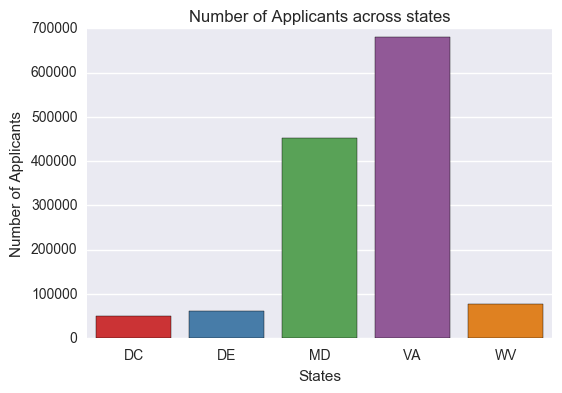

In [156]:
sns.countplot(data=merged_data,x='State', palette = 'Set1', order = ['DC', 'DE', 'MD', 'VA', 'WV'])
plt.ylabel('Number of Applicants')
plt.xlabel('States')
plt.title('Number of Applicants across states')

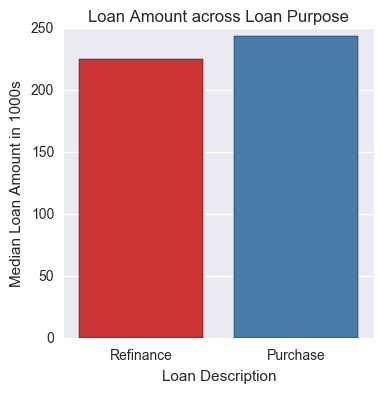

In [163]:
plt.figure(figsize=(4,4))
sns.barplot(x='Loan_Purpose_Description', y='Loan_Amount_000', ci = 0, data = minim_merged_data, estimator = np.median, palette = 'Set1')
plt.ylabel('Median Loan Amount in 1000s')
plt.xlabel('Loan Description')
plt.title('Loan Amount across Loan Purpose')

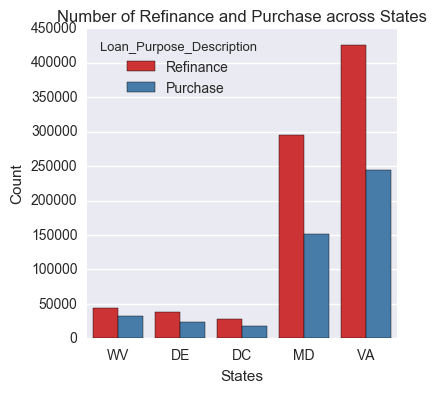

In [162]:
plt.figure(figsize=(4,4))
sns.countplot(x ='State', data = minim_merged_data, hue = 'Loan_Purpose_Description', palette = 'Set1')
plt.ylabel('Count')
plt.xlabel('States')
plt.title('Number of Refinance and Purchase across States')

('2012', 'DC', 20733, 316)
('2012', 'DE', 25238, 328)
('2012', 'MD', 194802, 609)
('2012', 'VA', 288091, 957)
('2012', 'WV', 29024, 334)
('2013', 'DC', 17395, 318)
('2013', 'DE', 22504, 320)
('2013', 'MD', 160472, 623)
('2013', 'VA', 244096, 813)
('2013', 'WV', 28490, 326)
('2014', 'DC', 11333, 288)
('2014', 'DE', 13964, 322)
('2014', 'MD', 97363, 600)
('2014', 'VA', 147516, 733)
('2014', 'WV', 20137, 343)


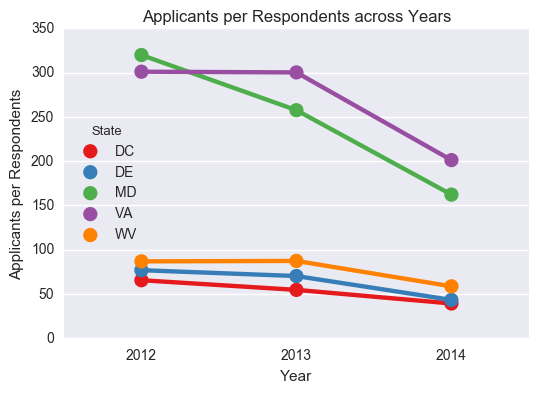

In [164]:
#plt.figure(figsize=(10,6))
#uniq_resp_count = list(merged_data.groupby('State').Respondent_ID.nunique())
uniq_state = sorted(list(set(list(merged_data.State))))
uniq_resp_count = list(merged_data.groupby(['As_of_Year','State']).Respondent_ID.nunique())
appln_count = list(merged_data.groupby(['As_of_Year','State']).Respondent_ID.count())
year = ['2012','2012','2012','2012','2012', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014']
state = []
state = sorted(list(set(list(merged_data.State))))*3
state_appln_year_combo = []
for i in zip(year,state,appln_count,uniq_resp_count):
    state_appln_year_combo.append(i)
state_appn_year_table = pd.DataFrame(state_appln_year_combo, columns = ['Year','State','No_of_Applicants','No_of_Respondents'])
state_appn_year_table['Applicants_per_Responder'] = state_appn_year_table['No_of_Applicants'] / state_appn_year_table['No_of_Respondents']
#sns.pointplot(data=state_appn_year_table,x='Year',y='No_of_Applicants', hue = 'State', join = True)
sns.pointplot(data=state_appn_year_table,x='Year',y='Applicants_per_Responder', hue = 'State', join = True, palette = 'Set1')
plt.ylabel('Applicants per Respondents')
plt.xlabel('Year')
plt.title('Applicants per Respondents across Years')
#print appln_count
#merged_data.groupby(['As_of_Year','State']).Respondent_ID.count()

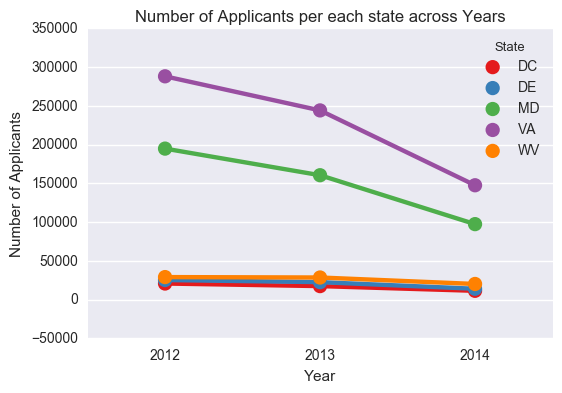

In [168]:
sns.pointplot(data=state_appn_year_table,x='Year',y='No_of_Applicants', hue = 'State', join = True, palette = 'Set1')
plt.ylabel('Number of Applicants')
plt.xlabel('Year')
plt.title('Number of Applicants per each state across Years')

In [180]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [181]:
merged_data = hmda_init()

In [182]:
minim_merged_data = merged_data[(pd.to_numeric(merged_data.Loan_Amount_000) <=800) & (merged_data.State == 'MD')]
# print minim_merged_data
# Taking only 6 numeric variables
list_for_cluster_compl = ['Applicant_Income_000','Census_Tract_Number', 'FFIEC_Median_Family_Income', 'Loan_Amount_000', 'Number_of_Owner_Occupied_Units', 'Tract_to_MSA_MD_Income_Pct']
minim_merged_data['Applicant_Income_000'] = pd.to_numeric(minim_merged_data['Applicant_Income_000'], errors='coerce')
df_before_cluster = pd.DataFrame(minim_merged_data['Applicant_Income_000'])
df_for_cluster = pd.DataFrame(minim_merged_data['Applicant_Income_000'])
list_for_cluster = ['Census_Tract_Number', 'FFIEC_Median_Family_Income', 'Loan_Amount_000','Number_of_Owner_Occupied_Units', 'Tract_to_MSA_MD_Income_Pct']
for i in list_for_cluster:
    minim_merged_data[i] = pd.to_numeric(minim_merged_data[i], errors = 'coerce')
    df_before_cluster[i] = minim_merged_data[i]
    df_for_cluster[i] = minim_merged_data[i]

df_before_cluster = df_before_cluster.dropna(axis = 0)
df_for_cluster = df_for_cluster.dropna(axis = 0)
for i in list_for_cluster_compl:
    df_for_cluster[i] = preprocessing.scale(df_for_cluster[i])


F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(406651, 6)
(406651, 6)


In [183]:
# Arrived at the number of clusters after comparing it across several number of clusters. Chose to keep it to 3 as it gave the maximum inter-cluster distance and minimum intra-cluster distance
kmeans = KMeans(n_clusters =3)
df_for_cluster['cluster'] = kmeans.fit_predict(df_for_cluster)

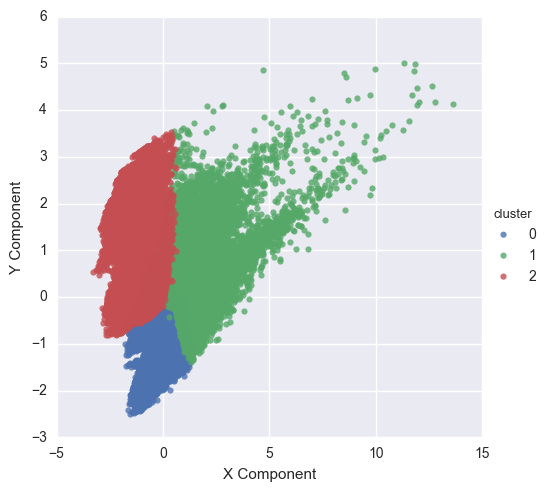

In [184]:
#Doing PCA to reduce the number of dimensions in order to visualize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2, whiten = True)
pca.fit(df_for_cluster[list_for_cluster_compl])
df_for_cluster['Comp1'] = pca.fit_transform(df_for_cluster[list_for_cluster_compl])[:,0]
df_for_cluster['Comp2'] = pca.fit_transform(df_for_cluster[list_for_cluster_compl])[:,1]
df_for_cluster_temp = df_for_cluster[df_for_cluster['Comp2'] < 5]
sns.lmplot(x = 'Comp1', y='Comp2', data = df_for_cluster_temp, hue = 'cluster', fit_reg = False)
plt.xlabel('X Component')
plt.ylabel('Y Component')

#### Looking into the characterestics of each cluster

In [91]:
df_before_cluster['cluster'] = df_for_cluster['cluster']
print df_before_cluster['cluster'].value_counts()
df_before_cluster.groupby('cluster').median()

1    174117
2    120062
0    112472
Name: cluster, dtype: int64


,Applicant_Income_000,Census_Tract_Number,FFIEC_Median_Family_Income,Loan_Amount_000,Number_of_Owner_Occupied_Units,Tract_to_MSA_MD_Income_Pct
cluster,,,,,,
0,156.0,7013.16,85600.0,394,1644.0,149.04
1,85.0,7519.02,107100.0,224,1274.0,98.94
2,76.0,4007.01,85600.0,182,1219.0,105.66


In [92]:
#For a classifcation model for new data points and understand the type of campaign that needs to be targetted for these customers
X = df_before_cluster[list_for_cluster_compl]
Y = df_before_cluster['cluster']
print X.shape
print Y.shape

(406651, 6)
(406651L,)


#### The following classifier can be used to classify new customers based on the data provided

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import metrics
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.4, random_state = 1234)
clf = RandomForestClassifier(n_estimators=300, max_depth = None, criterion='entropy', min_samples_split=1, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
#clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=5, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)
clf = clf.fit(X_train,Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
print "Training Accuracy: ",metrics.accuracy_score(Y_train_pred,Y_train)
print "Testing Accuracy: ",metrics.accuracy_score(Y_test_pred,Y_test)

Training Accuracy:  1.0
Testing Accuracy:  0.991165675853
